#Import Dataset

In [1]:
pip install ucimlrepo

# Data Understanding

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.

In [111]:
import matplotlib.pyplot as plt
import numpy as np

In [255]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets


# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [256]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlappin

#EDA

## Business Problem

Automating the recognition of handwritten digits is essential for improving efficiency and accuracy in various industries. This problem focuses on developing a robust system to classify handwritten numbers (0-9) using pixel-based image data, which has applications in sectors like banking and education.





## Data Overview

In [257]:
print("Dataset Overview:")
print("Shape of X (features):", X.shape)
print("Shape of y (targets):", y.shape)

Dataset Overview:
Shape of X (features): (5620, 64)
Shape of y (targets): (5620, 1)


In [90]:
print("First few rows of X:")
print(X[:5])

First few rows of X:
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute55  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            3   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...           12   

   Attribute56  Attribute57  Attribute58  Attribute59  Attribute60  \
0            

In [92]:
unique_labels = np.unique(y)
print("Unique labels in the dataset:", unique_labels)

Unique labels in the dataset: [0 1 2 3 4 5 6 7 8 9]


## Summary Statistic

In [94]:
import pandas as pd

In [103]:
X_dum = X.to_numpy()
y_dum = y.to_numpy().flatten()

In [97]:
X_df = pd.DataFrame(X)

# Basic statistics for features
print("Summary statistics for features:")
print(X_df.describe())

# Count of samples per label
print("\nCount of samples per label:")
label_counts = pd.Series(y_dum).value_counts().sort_index()
print(label_counts)

Summary statistics for features:
       Attribute1   Attribute2   Attribute3   Attribute4   Attribute5  \
count      5620.0  5620.000000  5620.000000  5620.000000  5620.000000   
mean          0.0     0.302135     5.393238    11.815480    11.578292   
std           0.0     0.879962     4.672719     4.255952     4.462546   
min           0.0     0.000000     0.000000     0.000000     0.000000   
25%           0.0     0.000000     1.000000    10.000000     9.000000   
50%           0.0     0.000000     5.000000    13.000000    13.000000   
75%           0.0     0.000000     9.000000    15.000000    15.000000   
max           0.0     8.000000    16.000000    16.000000    16.000000   

        Attribute6   Attribute7   Attribute8   Attribute9  Attribute10  ...  \
count  5620.000000  5620.000000  5620.000000  5620.000000  5620.000000  ...   
mean      5.593772     1.379359     0.138256     0.003203     1.971174  ...   
std       5.631149     3.356633     1.046998     0.090423     3.098815  

## Visualization

### Label Distribution

<ipython-input-81-6ef8e1eb0e5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.iloc[:, 0], palette="mako")


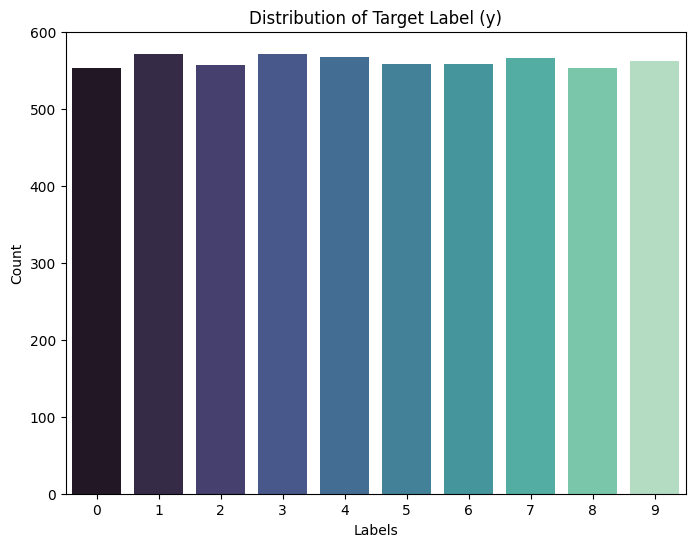

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y.iloc[:, 0], palette="mako")
plt.title("Distribution of Target Label (y)")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

### Pixel Intensity Distribution

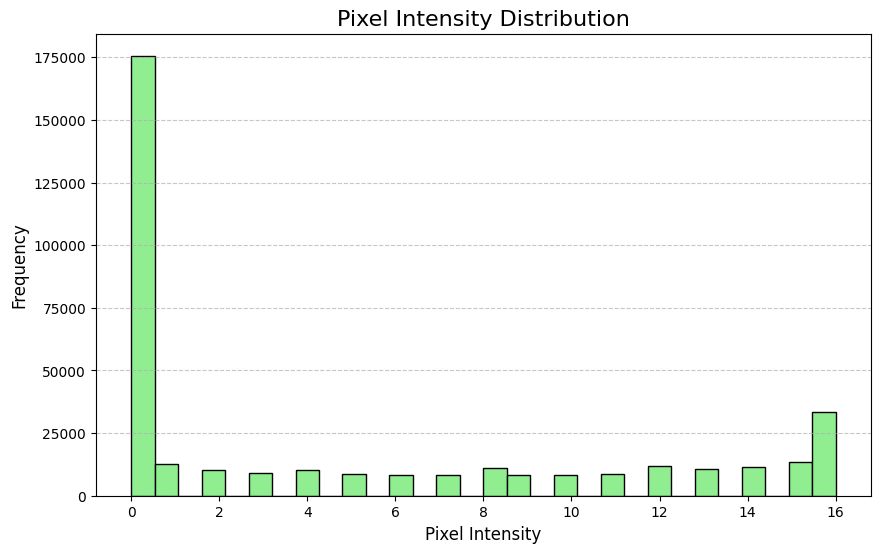

In [112]:
pixel_values = X_dum.flatten()

plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=30, color='lightgreen', edgecolor='black')
plt.title("Pixel Intensity Distribution", fontsize=16)
plt.xlabel("Pixel Intensity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Sample Digits

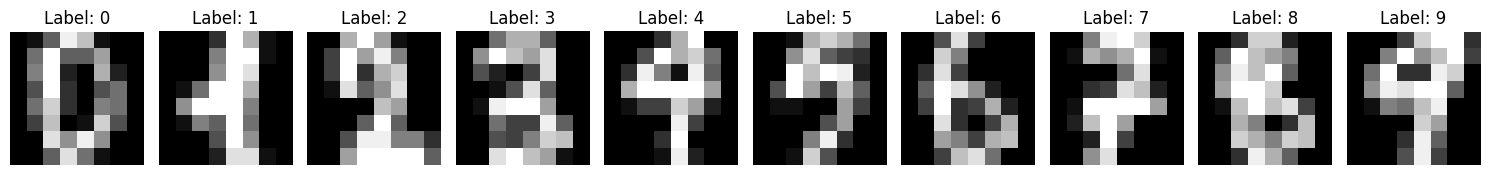

In [102]:
unique_labels = np.unique(y_dum)

fig, axes = plt.subplots(nrows=1, ncols=len(unique_labels), figsize=(15, 3))

for i, label in enumerate(unique_labels):
    index = np.where(y_dum == label)[0][0]
    image = X_dum[index].reshape(8, 8)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')  # Hide axis for cleaner visualization

plt.tight_layout()
plt.show()

### Correlation Analysis

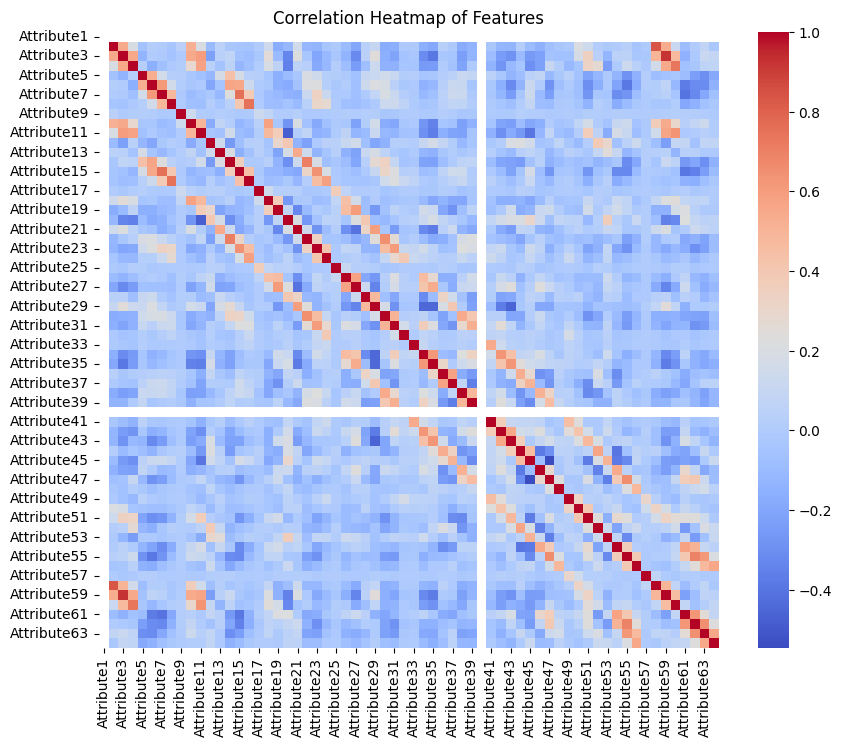

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Dimensionality Reduction

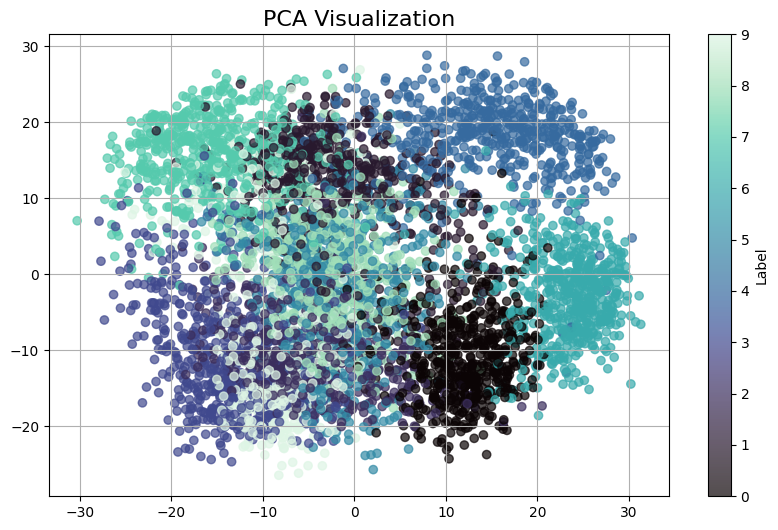

In [238]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

y_numeric = np.array(y, dtype=int)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='mako', alpha=0.7)
plt.colorbar(scatter, label='Label')
plt.title("PCA Visualization", fontsize=16)
plt.grid(True)
plt.show()

# Model

In [239]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

## Data Preparation

In [240]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

## Train the Model

In [242]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

## Evaluate the Model

In [243]:
y_pred = svm_model.predict(X_test)

In [244]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       0.99      1.00      1.00       171
           2       0.99      1.00      1.00       167
           3       0.98      0.98      0.98       172
           4       0.99      0.99      0.99       171
           5       0.98      0.99      0.99       167
           6       1.00      0.99      1.00       167
           7       0.99      0.99      0.99       170
           8       0.99      0.98      0.98       166
           9       0.98      0.96      0.97       169

    accuracy                           0.99      1686
   macro avg       0.99      0.99      0.99      1686
weighted avg       0.99      0.99      0.99      1686



In [245]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[166   0   0   0   0   0   0   0   0   0]
 [  0 171   0   0   0   0   0   0   0   0]
 [  0   0 167   0   0   0   0   0   0   0]
 [  0   0   1 169   0   1   0   1   0   0]
 [  0   0   0   0 170   0   0   0   1   0]
 [  0   0   0   0   0 166   0   0   0   1]
 [  0   0   0   0   1   0 166   0   0   0]
 [  0   0   0   0   1   0   0 168   0   1]
 [  0   1   0   1   0   0   0   0 163   1]
 [  0   0   0   2   0   2   0   1   1 163]]


## Hyperparameter Tuning

In [248]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [249]:
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model from grid search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       0.99      1.00      1.00       171
           2       1.00      1.00      1.00       167
           3       0.98      0.99      0.99       172
           4       0.99      1.00      1.00       171
           5       0.98      0.99      0.99       167
           6       1.00      0.99      1.00       167
           7       1.00      0.99      1.00       170
           8       0.99      0.98      0.98       166
           9       0.98      0.97      0.98       169

    accuracy                           0.99      1686
   macro avg       0.99      0.99      0.99      1686
weighted avg       0.99      0.99      0.99      1686



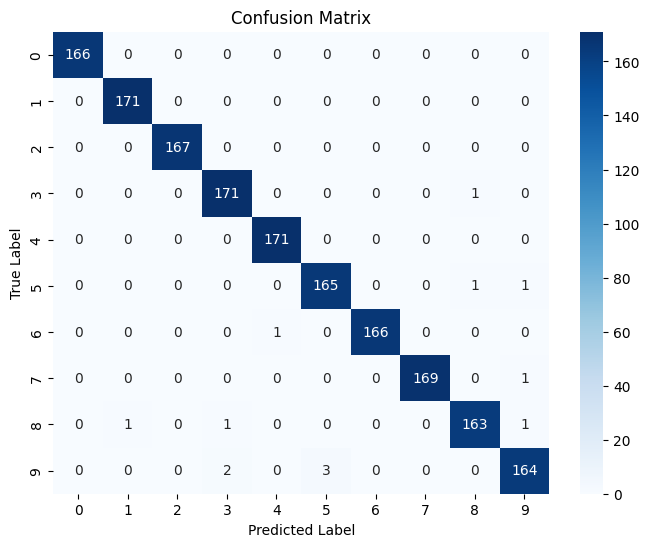

In [250]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [251]:
label_accuracy = cm.diagonal() / cm.sum(axis=1)
for label, acc in zip(np.unique(y), label_accuracy):
    print(f"Accuracy for Label {label}: {acc:.2f}")

Accuracy for Label 0: 1.00
Accuracy for Label 1: 1.00
Accuracy for Label 2: 1.00
Accuracy for Label 3: 0.99
Accuracy for Label 4: 1.00
Accuracy for Label 5: 0.99
Accuracy for Label 6: 0.99
Accuracy for Label 7: 0.99
Accuracy for Label 8: 0.98
Accuracy for Label 9: 0.97


In [259]:
from sklearn.metrics import classification_report, accuracy_score

In [265]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:6.3f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 99.229%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       0.99      1.00      1.00       171
           2       1.00      1.00      1.00       167
           3       0.98      0.99      0.99       172
           4       0.99      1.00      1.00       171
           5       0.98      0.99      0.99       167
           6       1.00      0.99      1.00       167
           7       1.00      0.99      1.00       170
           8       0.99      0.98      0.98       166
           9       0.98      0.97      0.98       169

    accuracy                           0.99      1686
   macro avg       0.99      0.99      0.99      1686
weighted avg       0.99      0.99      0.99      1686

